#Space Mission Launches


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df = pd.read_csv(r'C:\Users\GamingWorld\Desktop\python-D_C\misiones_espaciales_data\mission_launches.csv')

In [2]:
#Identificamos las columnas que tenemos en el csv.
print(df.columns)
print("******************************************************************************")
#Identificamos los que tipo es cada columna.
print(df.dtypes)
print("******************************************************************************")
#Con "HEAD" Mostramos las cinco primeras filas.
df.head()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')
******************************************************************************
Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object
******************************************************************************


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


#verificar si hay espacios nulos

In [3]:
#Acà verificamos si tenemos espacios nulos en cada columna
df.isnull().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [ ]:
# Contar valores nulos por columna
print(df.isnull().sum())

print("******************************************************************************")

# Contar el total de valores nulos
print("Total de valores nulos:", df.isnull().sum().sum())

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64
Total de valores nulos: 3360


In [5]:
price_NaN = df[df['Price'].isna() == 1]
price_NaN

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [6]:
df['Price'] = df['Price'].fillna('0').replace('Nan', '0')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].astype(float)
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [7]:
redondear = round(df['Price'].mean(),2)
df['Price'] = df['Price'].replace(0, redondear) #Nos ayuda a redondear la media y tener solo 2 decimales

In [8]:
#Convertir Date de object a 'datetime'
df['Date'] = pd.to_datetime(df['Date'], utc= True, errors= 'coerce')

#Agregar una nueva columna year(año)
df['Year'] = df['Date'].dt.year
df['Year'] = df['Year'].fillna(0).astype(int)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0.1    4324 non-null   int64              
 1   Unnamed: 0      4324 non-null   int64              
 2   Organisation    4324 non-null   object             
 3   Location        4324 non-null   object             
 4   Date            4198 non-null   datetime64[ns, UTC]
 5   Detail          4324 non-null   object             
 6   Rocket_Status   4324 non-null   object             
 7   Price           4309 non-null   float64            
 8   Mission_Status  4324 non-null   object             
 9   Year            4324 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 337.9+ KB


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,28.59,Success,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020


1. ¿Qué organización lanzó más misiones espaciales en un año determinado?


In [9]:
#filtraremos por año
filtrar_2020 = df[df['Year'] == 2020]
filtrar_2020

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,28.59,Success,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020
...,...,...,...,...,...,...,...,...,...,...
58,58,58,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2020-01-16 21:05:00+00:00,Ariane 5 ECA | Eutelsat Konnect BB4A & GSAT-30,StatusActive,200.00,Success,2020
59,59,59,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-01-16 03:02:00+00:00,Kuaizhou 1A | Yinhe-1,StatusActive,28.59,Success,2020
60,60,60,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-01-15 02:53:00+00:00,Long March 2D | Jilin-1 Wideband 01 & ??uSat-7/8,StatusActive,29.75,Success,2020
61,61,61,CASC,"LC-2, Xichang Satellite Launch Center, China",2020-01-07 15:20:00+00:00,Long March 3B/E | TJSW-5,StatusActive,29.15,Success,2020


In [10]:
year_filter = 2018
df_filtered = df[df['Year'] == year_filter]

In [11]:
top_org = df_filtered['Organisation'].value_counts().idxmax()
missions_count = df_filtered['Organisation'].value_counts().max()

print(f"La organización con más misiones en {year_filter} fue {top_org} con {missions_count} lanzamientos.")

La organización con más misiones en 2018 fue CASC con 37 lanzamientos.


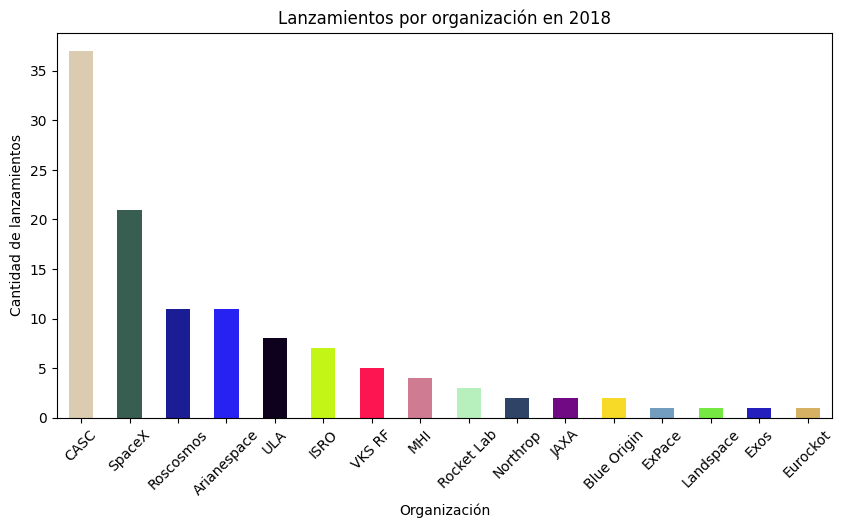

In [12]:
colors = np.random.rand(len(df_filtered['Organisation'].value_counts()), 3)  # RGB aleatorio

df_filtered['Organisation'].value_counts().plot(kind='bar', figsize=(10,5), color=colors)
plt.title(f"Lanzamientos por organización en {year_filter}")
plt.xlabel("Organización")
plt.ylabel("Cantidad de lanzamientos")
plt.xticks(rotation=45)
plt.show()

2. ¿Cuántos lanzamientos se realizaron por año? 


In [13]:
# Contamos los lanzamientos por año
lanzamientos_por_año = df['Year'].value_counts()

# Filtrar solo los años desde 1900 en adelante
lanzamientos_filtro = lanzamientos_por_año[lanzamientos_por_año.index >= 1900]

# Ordenar los años en orden ascendente
lanzamientos_filtro = lanzamientos_filtro.sort_index()

# Mostrar los datos
print(lanzamientos_filtro)




Year
1957      3
1958     22
1959     20
1960     38
1961     52
       ... 
2016     88
2017     90
2018    117
2019    107
2020     63
Name: count, Length: 64, dtype: int64


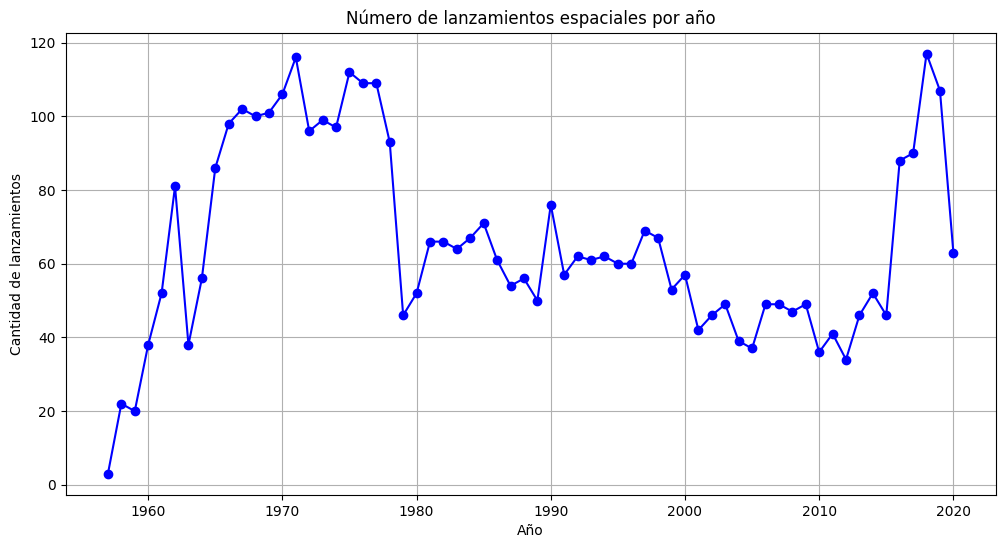

In [14]:
#visualización
plt.figure(figsize=(12,6))
plt.plot(lanzamientos_filtro.index, lanzamientos_filtro.values, marker='o', linestyle='-', color='b')
plt.xlabel("Año")
plt.ylabel("Cantidad de lanzamientos")
plt.title("Número de lanzamientos espaciales por año")
plt.grid()
plt.show()

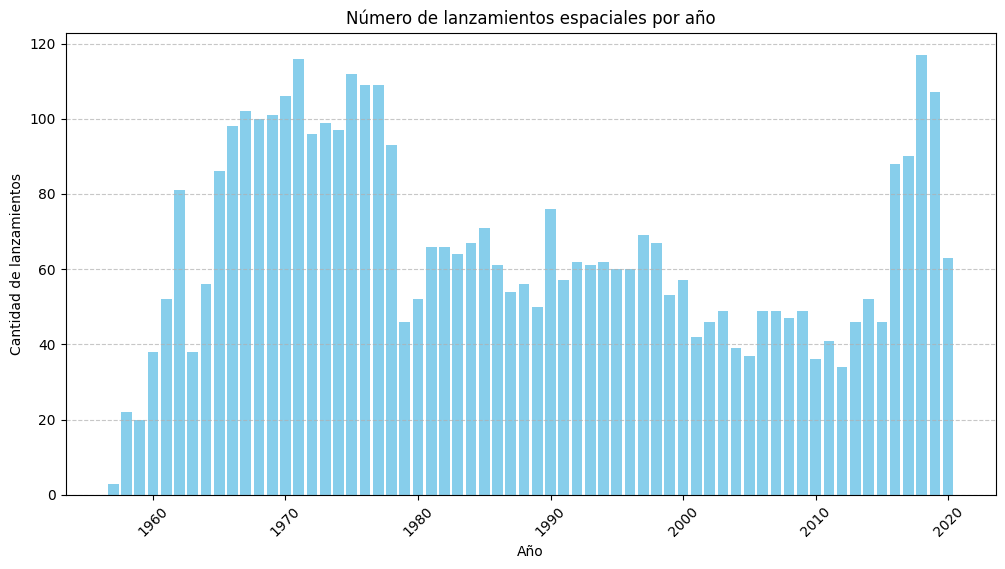

In [15]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12,6))

# Graficar en barras
plt.bar(lanzamientos_filtro.index, lanzamientos_filtro.values, color='skyblue')

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Cantidad de lanzamientos")
plt.title("Número de lanzamientos espaciales por año")

# Mejorar la visibilidad
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si hay muchos años
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía en el eje Y

# Mostrar el gráfico
plt.show()

3. ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?


In [16]:
df = df.drop(columns=["Unnamed: 0.1"])
df = df.drop(columns=["Unnamed: 0"])

Text(0, 0.5, 'Average Price')

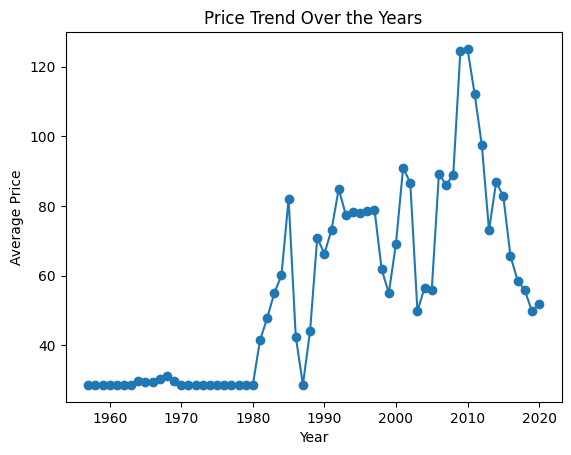

In [17]:
# Plot the average price spent for each year
lauches_cold_war =  df[df['Year']>=1900]
average_price = lauches_cold_war.groupby('Year')['Price'].mean().reset_index()


plt.plot(average_price['Year'], average_price['Price'], marker='o')
plt.title('Price Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')

4. ¿Qué meses son los más populares para los lanzamientos? 

In [18]:
#Agregar una nueva columna "Month"
df['Month'] = df['Date'].dt.month
df['Month'] = df['Date'].dt.strftime("%B") #Me da el nombre del mes

#Mostramos la suma de todos los lanzamientos en cada mes

lanzamientos_meses = df['Month'].value_counts()

print(lanzamientos_meses)

Month
December     430
June         386
October      375
April        366
August       358
September    354
March        349
July         347
November     325
February     323
May          320
January      265
Name: count, dtype: int64


In [19]:
orden_meses = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
# Reindexar para asegurar el orden correcto5
lanzamientos_meses = lanzamientos_meses.reindex(orden_meses, fill_value=0)

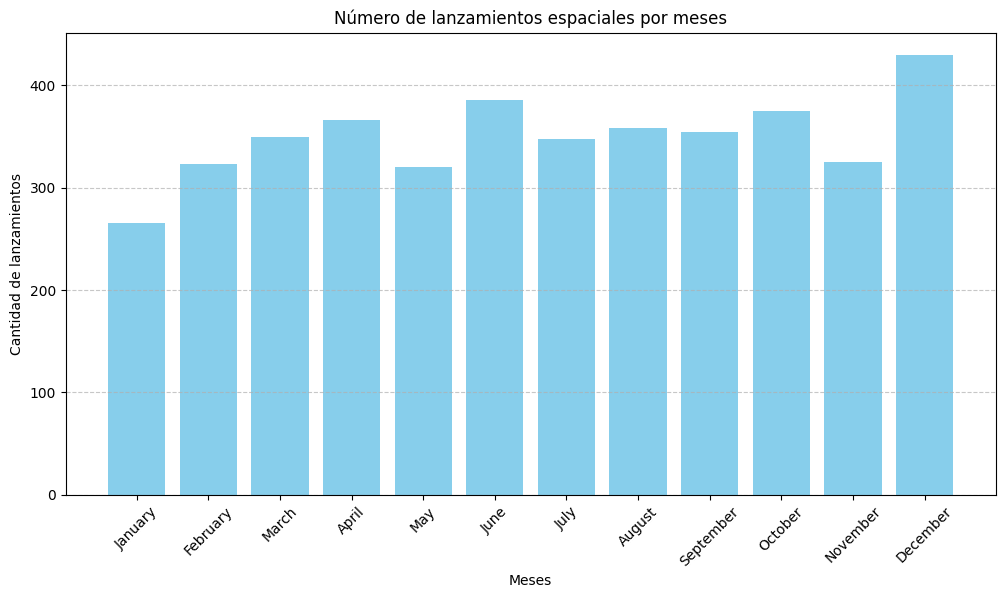

In [20]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12,6))

# Graficar en barras
plt.bar(lanzamientos_meses.index, lanzamientos_meses.values, color='skyblue')

# Etiquetas y título
plt.xlabel("Meses")
plt.ylabel("Cantidad de lanzamientos")
plt.title("Número de lanzamientos espaciales por meses")

# Mejorar la visibilidad
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si hay muchos años
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía en el eje Y

# Mostrar el gráfico
plt.show()

5. ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


#.size() cuenta cuántos lanzamientos hubo para cada combinación de año y estado.

#.unstack(fill_value=0) transforma la tabla para que los valores de Mission_Status sean columnas en lugar de filas, y llena los valores vacíos con 0.

In [21]:
lauches_cold_war =  df[df['Year']>=1900]

# Group by both 'Year' and 'Mission_Status', then count the occurrences
status_counts = lauches_cold_war.groupby(['Year', 'Mission_Status']).size().unstack(fill_value=0)
# 

status_counts = status_counts[['Failure', 'Partial Failure', 'Prelaunch Failure', 'Success']]
print(status_counts)

Mission_Status  Failure  Partial Failure  Prelaunch Failure  Success
Year                                                                
1957                  1                0                  0        2
1958                 14                2                  0        6
1959                  9                3                  0        8
1960                 19                0                  0       19
1961                 17                3                  0       32
...                 ...              ...                ...      ...
2016                  2                1                  1       84
2017                  5                2                  0       83
2018                  2                2                  0      113
2019                  5                2                  0      100
2020                  6                0                  0       57

[64 rows x 4 columns]


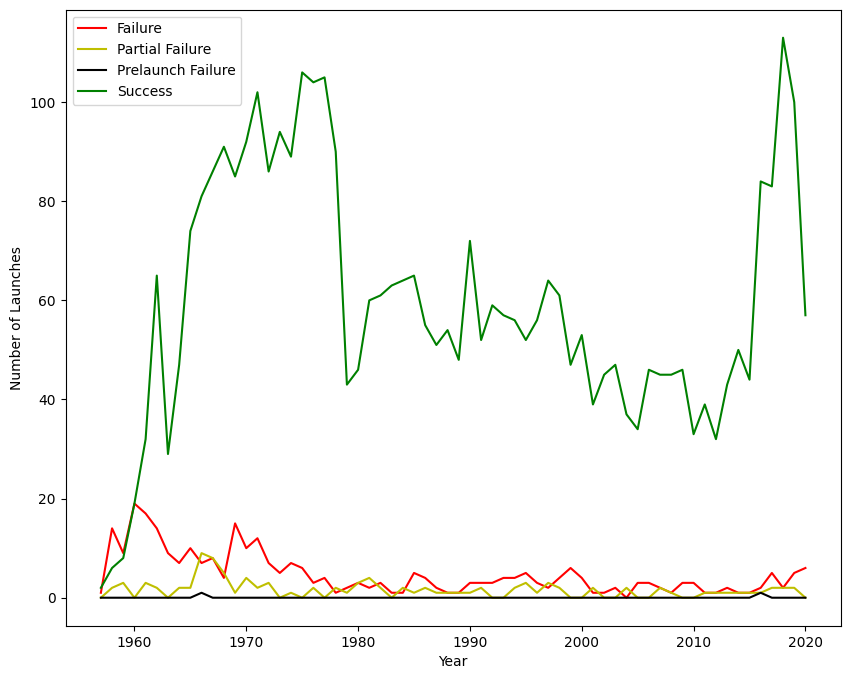

In [22]:
#Plot line chart with years and their status
plt.figure(figsize = (10,8))

plt.plot(status_counts.index, status_counts['Failure'], color='r', label='Failure')
plt.plot(status_counts.index, status_counts['Partial Failure'], color='y', label='Partial Failure')
plt.plot(status_counts.index, status_counts['Prelaunch Failure'], color='black', label='Prelaunch Failure')
plt.plot(status_counts.index, status_counts['Success'], color='g', label='Success')

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend()